# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("/content/car_data.csv")

In [12]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### PART 1

Find the linear regression equation for mileage vs price.

In [4]:
x = df[['Mileage']]
y = df[['Price']]

lr = linear_model.LinearRegression()
lr.fit(x, y)

print('intercept:', lr.intercept_[0])
print('coefficients:', lr.coef_[0][0])
print('r-squared:', lr.score(x, y))

intercept: 24764.559006061685
coefficients: -0.1725205027912493
r-squared: 0.02046344732348926


Text(0.5, 1.0, 'Mileage vs Price Comparison')

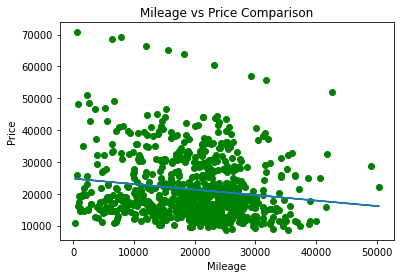

In [6]:
plt.scatter(x, y, color='g')
plt.plot(x, lr.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price Comparison')

In [7]:
print('r-squared: ', lr.score(x, y))

r-squared:  0.02046344732348926


### Part 2

1) Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [8]:
features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[features]
y = df[['Price']]
lr = linear_model.LinearRegression()
lr.fit(x, y)
print('intercept:', lr.intercept_)
print('coefficients:', lr.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


2) Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [9]:
print('r-squared: ',lr.score(x, y))

r-squared:  0.4462643536728379


3) Find the combination of the factors that is the best predictor for price.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [16]:
df["Price"]=df["Price"].astype("int64")
df["Liter"]=df["Liter"].astype("int64")

df["Make"]=df["Make"].map({"Buick":1,"Cadillac":2,"Chevrolet":3,"Pontiac":4,"SAAB":5,"Saturn":6})

In [19]:
df_preprocessed = pd.get_dummies(df)

In [21]:
df.shape,df_preprocessed.shape

((804, 12), (804, 93))

In [26]:
X=df_preprocessed.drop(columns=["Price"])
y=df_preprocessed["Price"]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [29]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
print(model.intercept_)
print(model.coef_)

12544.63903830291
[-1.87230490e-01 -5.26820021e+02  3.11033624e+03  2.35725049e+03
 -1.52596149e+03  3.78603819e+01  2.07578211e+02  3.12716357e+02
  1.42972363e+03  5.40198205e+03  5.33550744e+03  6.69473366e+03
  7.52365990e+03 -2.21202236e+03 -6.00778308e+03  1.01369292e+04
  8.23862477e+03 -2.45452442e+03 -8.36712954e+03 -1.09710849e+03
 -1.67233292e+03 -5.78448236e+02  3.78481180e+02 -3.43359284e+03
 -4.48470990e+03 -3.56334211e+03 -5.96591998e+03 -5.72675056e+03
  4.28504953e+01 -3.93026791e+03 -4.06501840e+03 -4.54798169e+03
 -7.28384622e+03 -6.55480784e+03 -1.24599172e+03  1.32745178e+04
  1.02090209e+04 -1.60141553e+03 -2.33336191e+03  8.46032454e+03
 -2.92708683e+02  2.34905544e+02  4.24160113e+03  8.06521882e+02
  3.72119989e+03  7.07407347e+03  2.85606303e+03 -2.73200655e+03
 -1.33593254e+03  2.92069089e+00 -7.37383956e+03 -1.79777962e+03
 -3.58813396e+03  2.22897733e+03  2.76720134e+03 -6.13998675e+03
 -1.72705866e+03 -3.87977596e+02  1.10108865e+03 -4.93209346e+03
  8.460

In [31]:
y_pred = model.predict(X_test)

In [37]:
r2_score = model.score(X_train,y_train)
print(r2_score)

0.9921241027414344


In [44]:
df_preprocessed.corr().unstack().sort_values(ascending=False).drop_duplicates()

Price         Price                  1.000000
Liter         Cylinder               0.907699
Model_9_5 HO  Trim_Aero Wagon 4D     0.702640
Model_9_3     Trim_Linear Conv 2D    0.702640
Trim_Conv 2D  Model_Corvette         0.702640
                                       ...   
Doors         Type_Convertible      -0.462921
              Trim_Coupe 2D         -0.462921
Make          Cylinder              -0.474727
Type_Sedan    Type_Coupe            -0.573605
Doors         Type_Coupe            -0.825444
Length: 1436, dtype: float64

### Task 3

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

*   Label Encoding is one of the preprocessing techniques to vectorize the dataset. Though Label Encoding does not increase the dimensionality of the dataset. However, Label Encoding induces ordering or hierarchy in features, causing ML models to cause bias when predicting target feature.
*   One-Hot Encoding is another effective technique, but this technique increses the dimension of the data and also induces many zeros in the dataset. 

